# **Módulo 43 - Introducción a la Regresión**

En este módulo, exploraremos los fundamentos de la regresión linea, una herramienta esencial en el análisis de datos y el Machine Learning. Aprenderemos a aplicar modelos de regresión para predecir resultados y entender la relación entre variables. A continuación, se destacan los temas que abordaremos:

### **Regresión Lineal Simple y Múltiple**

Descubre cómo transformar datos en ecuaciones lineales que minimizan las diferencias entre los puntos de datos y la línea de regresión. Utilizaremos ejemplos prácticos para ilustrar estos conceptos, como la relación entre horas de estudio y calificaciones.

### **Premisas de la Regresión**

Aprende sobre las condiciones necesarias para que un modelo de regresión sea válido, incluyendo la linealidad, normalidad de los residuos, homoscedasticidad y mas. Estas premisas son cruciales para asegurar la robustez del modelo.

### **Análisis Exploratorio de Datos EDA**

Realiza un análisis exploratorio de datos para comprender mejor las relaciones entre variables. Utilizaremos herramientas como 'groupby' y 'crosstab' para realizar análisis bivariados y discutir las implicaciones de los resultados.

________

# **Conceptos Básicos de Regresión**

- Existe una ecación detrás y = x0 + c1x1 + c2x2 + c3x3 (es una línea recta).
- El objetivo final es averiguar los coeficientes óptimos, que reduzcan la distancia entre las predicciones y los valores reales.
- Puede ser una regresión simple o multivariable.
- Esa distancia se llama R2 (coeficiente de determinación).
- Además, se tiene una serie de premisas que deben respetarse.
    - Linearity: The relationship between X and the mean of Y is linear.
    - Normality: The residuals follow a normal distribution and the expected mean of the residuals es zero.
    - Homoscedasticity: The variance od residual is constant for all values of X.
    - No autocorrelation: Residuals are independent of each other.
    - No multicollinearity: There is no high correlation between predictor variables.

# **El problema: Predecir el precio de las casas, basado en los 545 registros del Dataset**
____

In [14]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\49_Módulo_43_Introducción_a_la_Regresión_Lineal')

df = pd.read_csv(r"C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\49_Módulo_43_Introducción_a_la_Regresión_Lineal\kc_house_data.csv", sep=',')

____
# **Exploratory Data Analysis**

In [15]:
df.sample(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12671,8819900220,20150205T000000,686500.00,2,1.75,1390,5025,1.50,0,0,...,8,1390.00,0,1928,0,98105,47.67,-122.29,2160,5000
2134,9264901040,20140516T000000,239900.00,4,2.25,1860,7000,1.00,0,0,...,8,1120.00,740,1979,0,98023,47.31,-122.34,1990,8937
4406,3505100756,20141106T000000,2050000.00,4,3.00,4280,18834,1.00,0,4,...,11,2180.00,2100,1971,0,98116,47.58,-122.40,2490,8858


In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [17]:
columnas = df.columns

for i in columnas:
    print('\n')
    print([i])
    print(df[i].unique())



['id']
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]


['date']
['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '20140624T000000' '20150302T000000'
 '20141110T000000' '20141203T000000' '20140613T000000' '20141230T000000'
 '20150213T000000' '20140620T000000' '20140715T000000' '20140811T000000'
 '20140707T000000' '20141028T000000' '20140729T000000' '20140718T000000'
 '20150325T000000' '20140716T000000' '20150428T000000' '20150311T000000'
 '20140916T000000' '20150217T000000' '20141231T000000' '20150205T000000'
 '20150303T000000' '20140819T000

In [18]:
print(f'Existen {df.isna().sum().sum()} vacios en nuestro DataFrame')
print(f'Existen {df.isnull().sum().sum()} inexistentes en nuestro DataFrame')

Existen 2 vacios en nuestro DataFrame
Existen 2 inexistentes en nuestro DataFrame


In [19]:
df = df.dropna(subset=['sqft_above'])

In [20]:
for i in columnas:
    print(f'la columna {[i]} ______ {pd.api.types.is_numeric_dtype(df[i])}')

la columna ['id'] ______ True
la columna ['date'] ______ False
la columna ['price'] ______ True
la columna ['bedrooms'] ______ True
la columna ['bathrooms'] ______ True
la columna ['sqft_living'] ______ True
la columna ['sqft_lot'] ______ True
la columna ['floors'] ______ True
la columna ['waterfront'] ______ True
la columna ['view'] ______ True
la columna ['condition'] ______ True
la columna ['grade'] ______ True
la columna ['sqft_above'] ______ True
la columna ['sqft_basement'] ______ True
la columna ['yr_built'] ______ True
la columna ['yr_renovated'] ______ True
la columna ['zipcode'] ______ True
la columna ['lat'] ______ True
la columna ['long'] ______ True
la columna ['sqft_living15'] ______ True
la columna ['sqft_lot15'] ______ True


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long       

In [22]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21611.00,4580327368.92,2876591655.90,1000102.00,2123049307.00,3904930410.00,7308900467.50,9900000190.00
price,21611.00,540085.03,367143.05,75000.00,321725.00,450000.00,645000.00,7700000.00
bedrooms,21611.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21611.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21611.00,2079.85,918.42,290.00,1426.00,1910.00,2550.00,13540.00
sqft_lot,21611.00,15107.71,41422.35,520.00,5040.00,7618.00,10688.50,1651359.00
floors,21611.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21611.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21611.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21611.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


In [24]:
df.nunique()

id               21434
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

____
# **Entender El DataFrame**

Descripción de los Campos:
- id (#)
- date (#)
- price (#)
- bedrooms (#)
- bathrooms (#)
- sqft_living (#)
- sqft_lot (#)
- floors (#)
- waterfront (#)
- view (#)
- condition (#)
- grade (#)
- sqft_above (#)
- sqft_basement (#)
- yr_built (#)
- yr_renovated (#)
- zipcode (#)
- lat (#)
- long (#)
- sqft_living15 (#)
- sqft_loft15 (#)

## **Insights**
- El DataFrame no tiene columnas con valores únicos que pudiéramos eliminar.
- No tiene columnas que debamos convertir a 'int' o 'float'.

____
# **Feature Engineering**

El DataFrame ya es todo numérico a excepción de la columna 'date' y 'id', para este ejercicio no la vamos a necesitar así que la vamos a eliminar. Fuera de eso no tenemos más campos que podamos convertir a número.

In [25]:
df.drop(columns='date', inplace=True)
df.drop(columns='id', inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64
 17  sqft_living15  21611 non-null  int64  
 18  sqft_lot15 

# **Análisis Correlación**

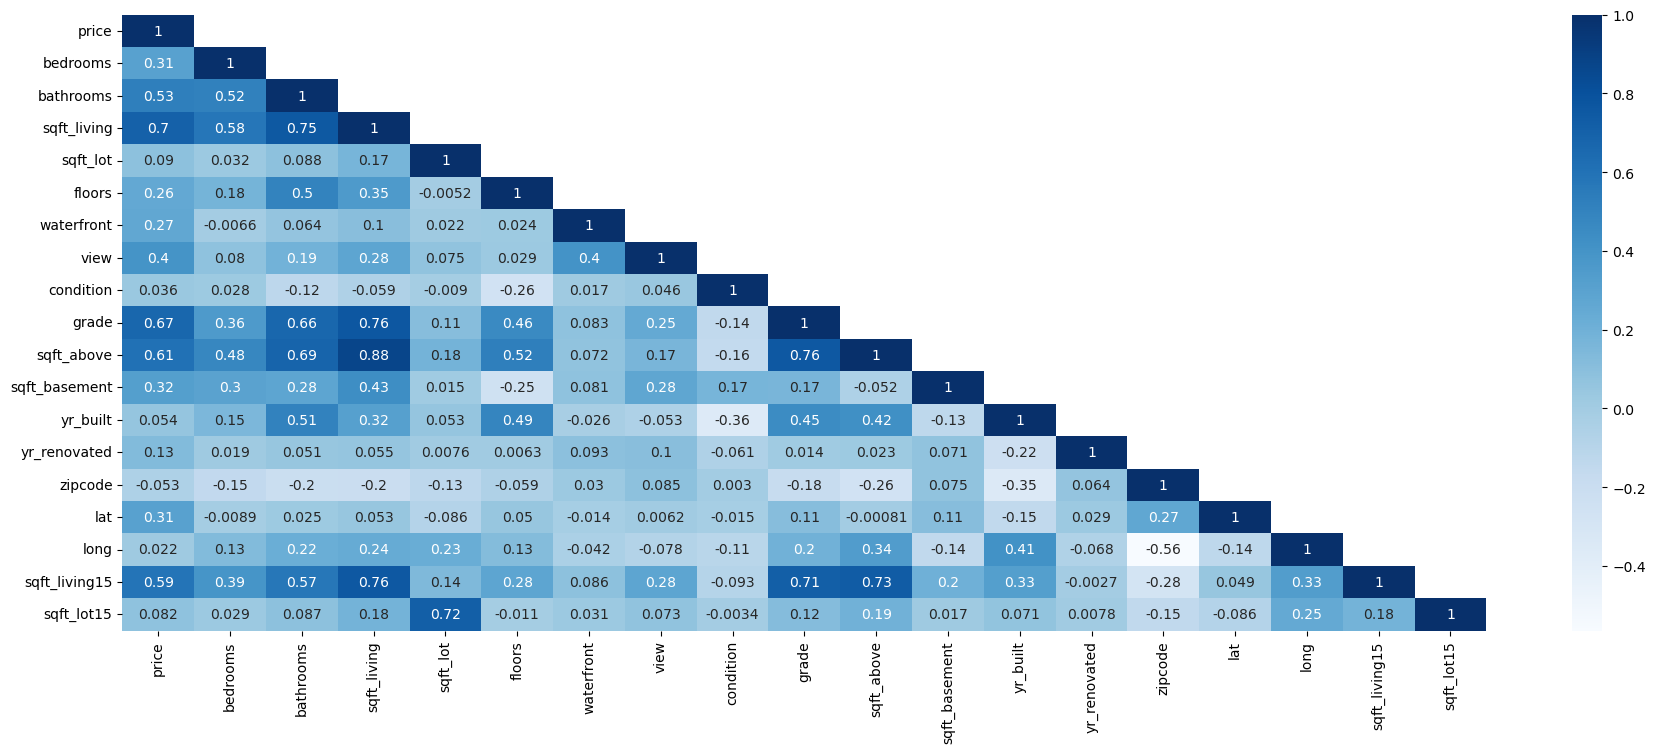

In [27]:
plt.figure(figsize=(22,8))
corr_df = corr = df.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap=sns.heatmap(df_lt, cmap='Blues', annot=True)

## **Insights Correlación**
- No es necesario revisar a mayor profundidad las variables, ya que ninguna tiene una correlación superior a 80%.
    - Cuando dos variables tienen una correlación de 95% o superior, debemos preguntarnos si una no es causalidad de la otra y preguntarnos si esta no afecta nuestro modelo de regresión.

In [28]:
print('Lista completa de columnas')
print('-------------------------')
print(df.columns)
print(len(df.columns), ' columnas')

cols_num = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
            'floors', 'waterfront', 'view', 'condition', 'grade',
              'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
              'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

Lista completa de columnas
-------------------------
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
19  columnas


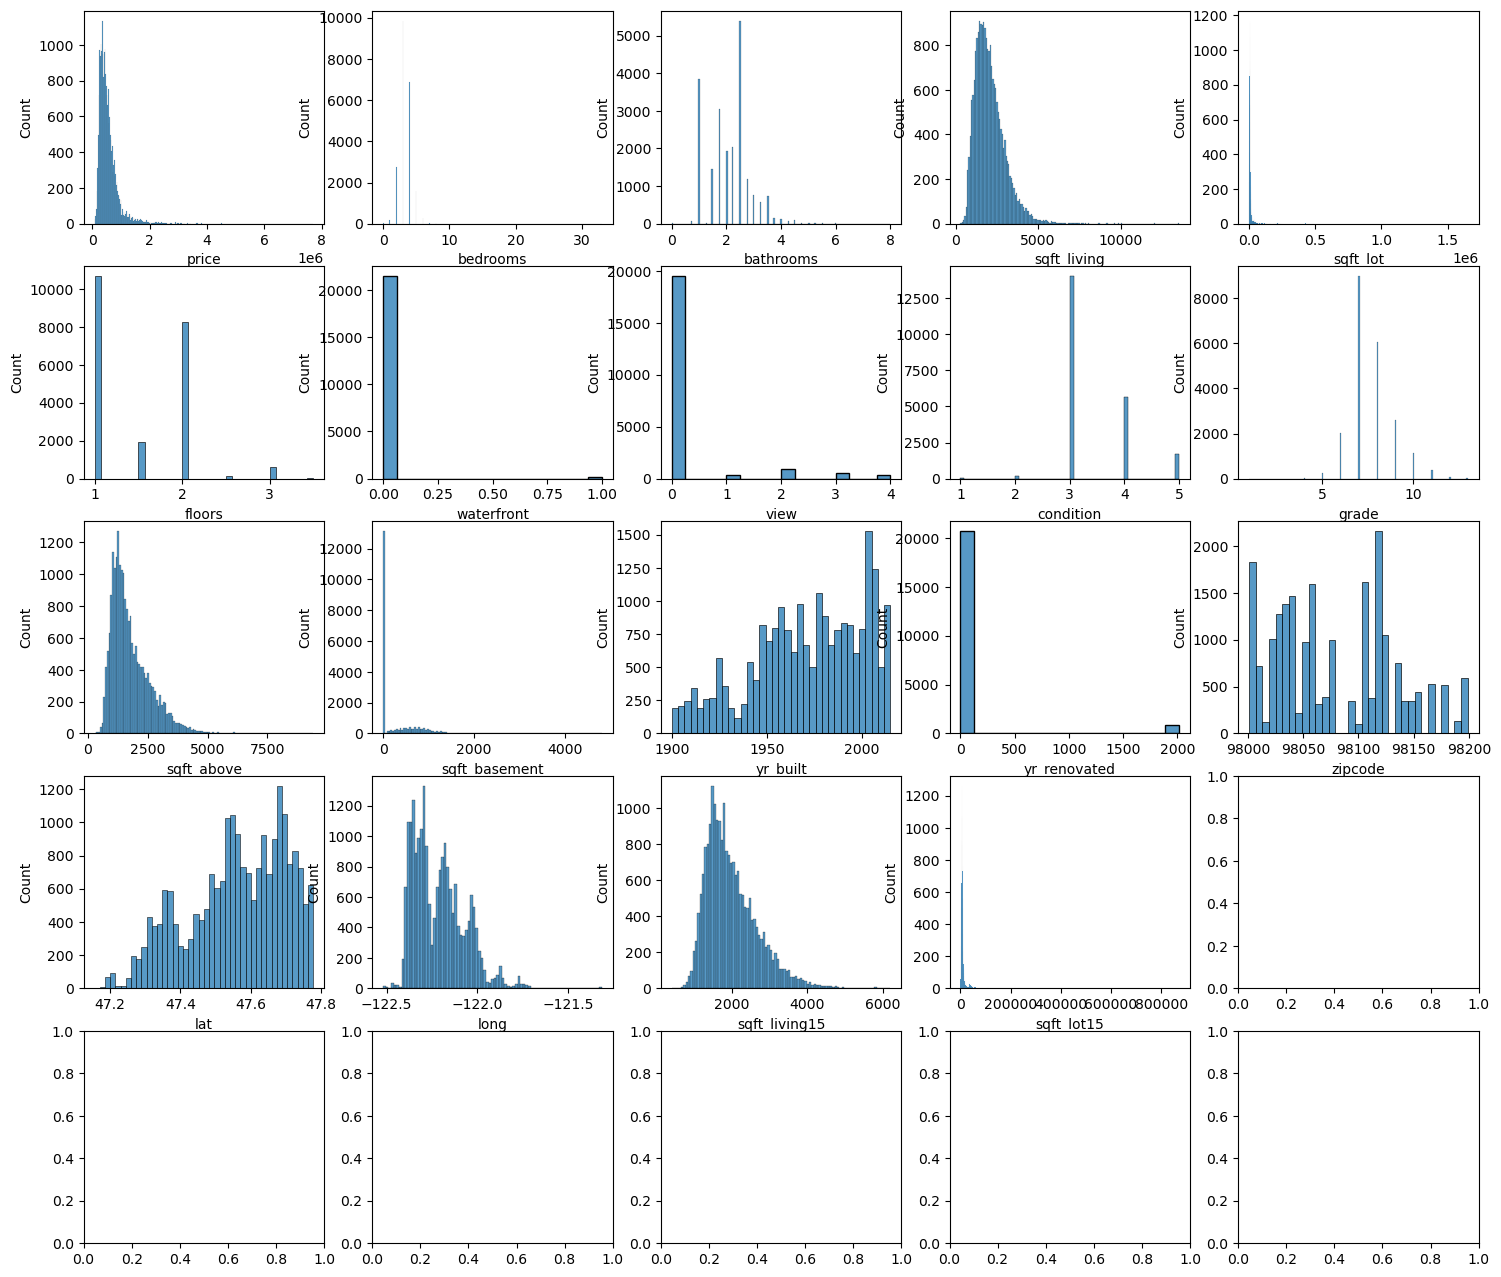

In [29]:
fig, axes = plt.subplots(nrows= 5, ncols=5, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.histplot(df[column], ax=axes[i//5, i%5], kde=False)

# **Análisis Bivariado**

In [30]:
df.groupby(['condition']).mean().T

condition,1,2,3,4,5
price,334431.67,327287.15,542003.99,521206.77,612418.09
bedrooms,2.47,2.83,3.37,3.36,3.46
bathrooms,1.18,1.45,2.22,1.90,2.02
sqft_living,1216.00,1410.06,2148.94,1951.05,2022.91
sqft_lot,22131.07,32502.90,14758.64,16021.89,13052.58
floors,1.15,1.16,1.62,1.26,1.27
waterfront,0.03,0.01,0.01,0.01,0.01
view,0.30,0.08,0.21,0.26,0.32
grade,5.80,6.51,7.83,7.38,7.32
sqft_above,1144.33,1243.60,1906.82,1590.75,1537.79


In [31]:
df.groupby(['bedrooms']).mean().T

bedrooms,0,1,2,3,4,5,6,7,8,9,10,11,33
price,409503.85,317642.88,401372.68,466212.10,635441.36,786599.83,825520.64,951184.66,1105076.92,893999.83,819333.33,520000.00,640000.00
bathrooms,0.83,1.07,1.40,1.97,2.44,2.78,3.07,3.65,3.56,4.42,3.42,3.00,1.75
sqft_living,1707.85,884.61,1239.75,1805.66,2554.79,3047.55,3284.34,3974.21,3800.00,3775.00,3706.67,3000.00,1620.00
sqft_lot,24141.31,16285.67,12096.73,14415.26,16722.60,16769.02,18586.93,20840.55,8971.62,5480.00,8859.67,4960.00,6000.00
floors,1.96,1.15,1.31,1.45,1.62,1.58,1.61,1.72,1.69,2.17,1.67,2.00,1.00
waterfront,0.00,0.03,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00
view,0.31,0.25,0.18,0.19,0.27,0.41,0.54,0.50,0.23,0.00,0.67,0.00,0.00
condition,2.85,3.27,3.38,3.42,3.41,3.45,3.47,3.45,3.54,3.00,3.67,3.00,5.00
grade,6.69,6.10,6.87,7.47,8.12,8.27,8.08,8.45,8.08,7.83,7.67,7.00,7.00
sqft_above,1707.85,823.86,1107.24,1584.41,2198.39,2407.57,2494.39,3160.26,2660.77,2935.00,2456.67,2400.00,1040.00


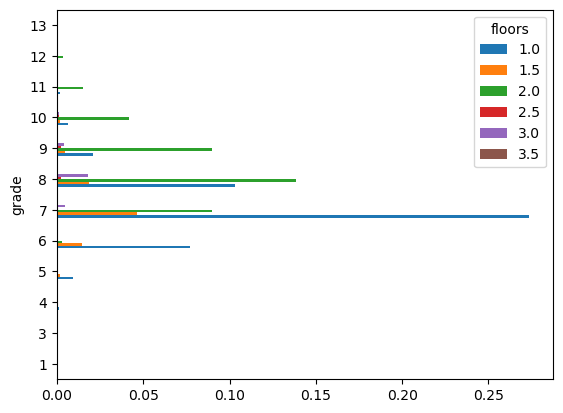

In [32]:
ct = pd.crosstab(df['grade'], df['floors'], normalize=True).plot.barh(stacked=False)

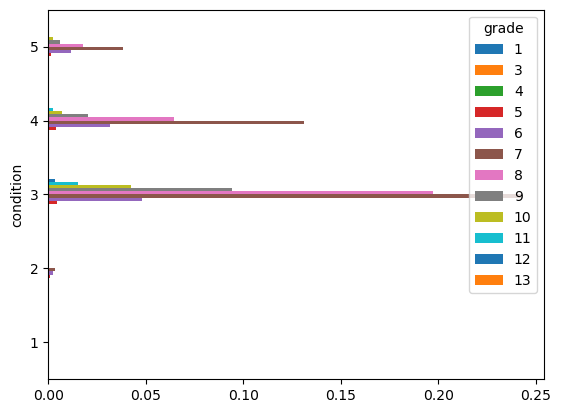

In [33]:
ct = pd.crosstab(df['condition'], df['grade'], normalize=True).plot.barh(stacked=False)

# **Modelo de Regresión**

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Construcción de los DataFrames 'X' (mayúscula) e 'y' (minúscula) para la regresión

### Variables independientes

In [35]:
X = df.drop(['price'], axis = 1)

### Variables dependientes

In [36]:
y = df[['price']]

In [37]:
y.head()

,price
0,221900.00
1,538000.00
2,180000.00
3,604000.00
4,510000.00


### Divide a los DataFrames en 70/30

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## **Ejecuta la regresión lineal**

### Construye el regresor

In [39]:
regression_model = LinearRegression()

### Genera el fit de la regresión con la función fit

In [40]:
regression_model.fit(X_train, y_train)

LinearRegression()

### Obtiene el coeficiente de regresión de entrenamiento (R2)

In [41]:
regression_model.score(X_train, y_train)

0.6925551342240801

### Obtiene el coeficiente de regresión de test.
(Es el R2, o cuánto explica el modelo de la data del set)

In [42]:
regression_model.score(X_test, y_test)

0.7153962762729256

### Generamos las predicciones

In [43]:
y_pred = regression_model.predict(X_test)

### Comparación de Predicción vs Actual

In [44]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
df_preds.head(10)

,Actual,Predicted
15544,459000.00,640456.56
18932,465000.00,582906.57
20187,462550.00,397489.27
3429,475000.00,638411.49
8811,750000.00,566099.57
3296,282000.00,384619.81
277,770000.00,992267.78
8738,335000.00,560989.07
6163,390000.00,547259.01
19832,449950.00,526718.16


## **Insights**

- Con la tabla comparativa entonces podemos tomar decisiones de negocio, por ejemplo, podemos poner una regla de negocio que indique que cada vez que algún precio esté con una desviación del 20% arriba o abajo, me levante una alerta para que se revise el caso de forma particular.

## **Otras medidas del Modelo**

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
y_pred = regression_model.predict(X_test)

### Suma absoluta de las diferencias

In [47]:
mae = mean_absolute_error(y_test, y_pred)

### Suma absoluta de las diferencias al cuadrado

In [48]:
mse = mean_squared_error(y_test, y_pred)

### Raíz cuadrada de la suma absoluta de las diferencias al cuadrado

In [49]:
rmse = np.sqrt(mse)

In [50]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 125143.41
Mean squared error: 39194042530.05
Root mean squared error: 197974.85


### Obtenemos los coeficientes de la ecuación (forma de visualizar 1)

In [51]:
for idx, col_name in enumerate(X_train.columns):
    print('coef {} = {}'.format(col_name, regression_model.coef_[0][idx]))

coef bedrooms = -33978.634252622505
coef bathrooms = 40061.34035033767
coef sqft_living = 111.6528741027179
coef sqft_lot = 0.1670775782356512
coef floors = 7293.711637479081
coef waterfront = 592965.927174729
coef view = 48211.2562554738
coef condition = 24821.57540912664
coef grade = 94490.11851086603
coef sqft_above = 69.6209770081741
coef sqft_basement = 42.03189687457974
coef yr_built = -2604.2350279942452
coef yr_renovated = 21.37165670063288
coef zipcode = -578.2018438168842
coef lat = 608405.2653194253
coef long = -221890.36834749434
coef sqft_living15 = 21.38875063177844
coef sqft_lot15 = -0.35241905673989643


### Obtenemos los coeficientes de la ecuación (forma de visualizar 2)

In [52]:
# Creamos una lista para ir guardando los datos
rows = []

# Intercept
rows.append({'Var': 'Intercept', 'Coeff': regression_model.intercept_[0]})

# Coeficientes
for idx, col_name in enumerate(X_train.columns):
    rows.append({'Var': col_name, 'Coeff': regression_model.coef_[0][idx]})

# Convertimos la lista a DataFrame
coeff_data = pd.DataFrame(rows)

# mostramos el DataFrame
coeff_data

,Var,Coeff
0,Intercept,5110776.22
1,bedrooms,-33978.63
2,bathrooms,40061.34
3,sqft_living,111.65
4,sqft_lot,0.17
5,floors,7293.71
6,waterfront,592965.93
7,view,48211.26
8,condition,24821.58
9,grade,94490.12


### Comparación de las predicciones con los reales

Text(0.5, 1.0, 'Comparación de Predicción (x) vs Real (y)')

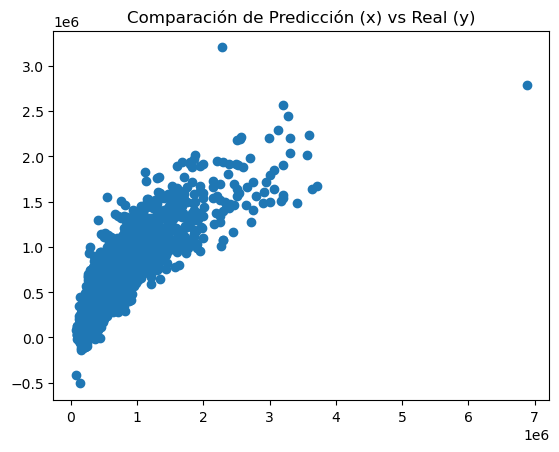

In [53]:
predcitions = regression_model.predict(X_test)
plt.scatter(y_test, predcitions)
plt.title('Comparación de Predicción (x) vs Real (y)')

### Generación de Residuos

Text(0.5, 1.0, 'Residuals')

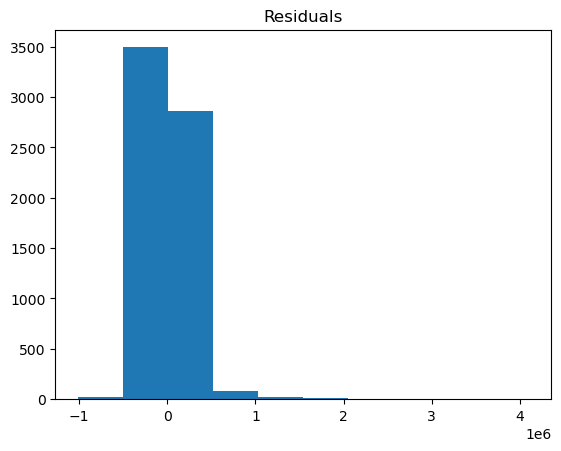

In [54]:
plt.hist(y_test - predcitions)
plt.title('Residuals')

### Visualización de algunas variables presentes en la regresión

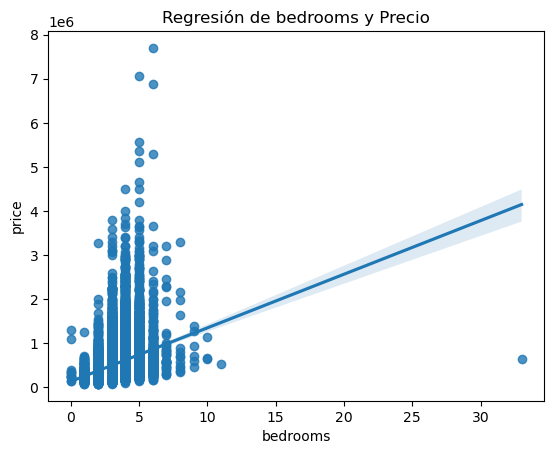

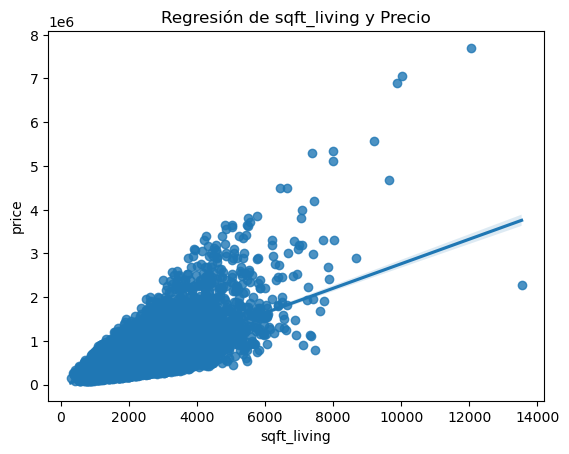

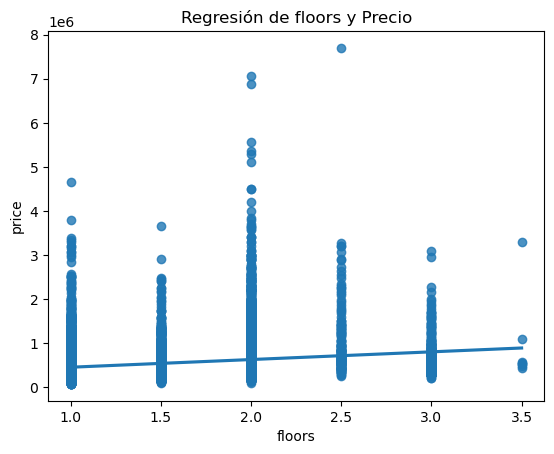

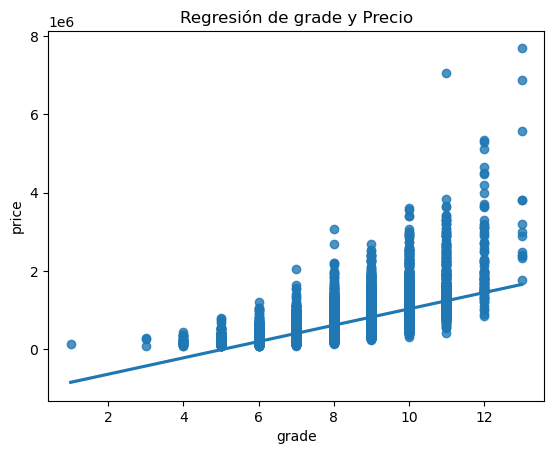

In [55]:
import seaborn as sns

variables = ['bedrooms', 'sqft_living', 'floors', 'grade']

for var in variables:
    plt.figure()
    sns.regplot(x=var, y='price', data=df).set(title = f'Regresión de {var} y Precio')

# **GLOSARIO**

- **Autocorrelación**

La autocorrelación se refiere a la correlación de una serie de datos con versiones retrasadas de si misma. En el contexto de la regresión, la presencia de autocorrelación puede indicar que los residuos no son independientes, lo cual es una violación de las premisas del modelo.

- **Crosstab**

Una herramienta utilizada en el análisis exploratorio de datos para resumir la relación entre dos variables categóricas en forma de tabla de contingencia, mostrando la frecuencia de cada combinación de categorías. 

- **Error Cuadrático Medio (Mean Squared Erro)**

Una métrica utilizada para evaluar la calidad de un modelo de regresión, calculando la media de los cuadrados de las diferencias entre los valores predichos y los valores reales.

- **Homoscedasticidad**

Una condición en la que la varianza de los residuos es constante a lo largo de todas las observaciones en un modelo de regresión. La falta de homoscedasticidad puede afectar la validez de las inferencias del modelo.

- **Imputaciones de Valores Faltantes**

El proceso de reemplazar los valores faltantes en un conjunto de datos con estimaciones razonables, para permitir un análisis más completo y preciso.

- **Linealidad**

Una premisa fundamental de la regresión lineal que asume que existe una relación lineal entre las variables independientes y la variable dependiente.

- **Multicolinealidad**

Una situación en la que dos o más variables independientes en un modelo de regresión estpan altamente correlacionadas, lo que puede dificultar la estimación precisa de los coeficientes del modelo.

- **Normalidad de los Residuos**

Una suposición en la regresión lineal de que los residuos (diferencias entre los valores y predichos) siguen una distribución normal, lo cual es importante para la validez de las pruebas estadísticas. 

- **Overfitting (sobreajuste)**

Un problema en el que un modelo de regresión se ajusta demasiado a los datos de entrenamiento, capturando el ruido en lugar de la señal subyacente, lo que resulta en un rendimiento deficiente en datos nuevos.

- **Train_Test_Split**

Una función utilizada para dividir un conjunto de datos en conjuntos de entrenamiento y prueba, lo que permite evaluar la capacidad predictiva de un modelo de regresión en datos no vistos.